<a href="https://colab.research.google.com/github/zhanmdd/glassdoor-reviews-sentiment-BERT/blob/master/Glassdoor_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Expoloratory Data Analysis on Glassdoor Reviews of 20 IT Companies 

Now we have scraped and cleaned the data. Now, it's time to look at general picture of what we are dealing with by exploring tendencies, distributions and some general stats in the dataset.

##Loading libraries and the dataset

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

In [25]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['df_cleaned.csv']))

Saving df_cleaned.csv to df_cleaned (2).csv


##Examining Our Dataset

In [6]:
df.head()

,company_name,employee_title,employee_status,state,city,date,rating,sentiment,review
0,CoStar-Group,Market Research Analyst II,Current Employee,VA,Richmond,2020-01-22 08:38:01,5.0,2,Best company I had ever worked for in 3 decade...
1,CoStar-Group,Inside Sales Representative,Current Employee,NaN,NaN,2020-07-16 10:23:06,5.0,2,Great Place to Make Money. I have been working...
2,CoStar-Group,Inside Sales Representative,Current Employee,DC,Washington,2020-07-16 10:49:00,5.0,2,Great place to start a career and make money. ...
3,CoStar-Group,Senior Account Manager,Former Employee,DC,Washington,2020-07-15 11:13:00,4.0,2,Great Company. I worked at CoStar Group full-t...
4,CoStar-Group,Tenant Research Associate,Current Employee,VA,Richmond,2020-07-21 17:49:46,2.0,0,DO NOT GET SUCKED FOR THE MONEY!!!I have been ...


In [7]:
df.shape

(10124, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10124 entries, 0 to 10123
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company_name     10124 non-null  object 
 1   employee_title   5926 non-null   object 
 2   employee_status  10124 non-null  object 
 3   state            6103 non-null   object 
 4   city             6103 non-null   object 
 5   date             10124 non-null  object 
 6   rating           10124 non-null  float64
 7   sentiment        10124 non-null  int64  
 8   review           10124 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 712.0+ KB


In [27]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10124 entries, 0 to 10123
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company_name     10124 non-null  object        
 1   employee_title   5926 non-null   object        
 2   employee_status  10124 non-null  object        
 3   state            6103 non-null   object        
 4   city             6103 non-null   object        
 5   date             10124 non-null  datetime64[ns]
 6   rating           10124 non-null  float64       
 7   sentiment        10124 non-null  int64         
 8   review           10124 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 712.0+ KB


In [28]:
df.describe()

,rating,sentiment
count,10124.000000,10124.000000
mean,3.423153,1.260470
std,1.430231,0.865334
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,2.000000
75%,5.000000,2.000000
max,5.000000,2.000000


##Visualzing Ratings

**The number of reviews per score.** As expected, there are way more reviews with 4 and 5 score than with the 1, 2 or 3. From my personal experience, this is a normal distribution since people who either don't really enjoy or don't care about a company tend not to leave any reviews.

Text(0.5, 1.0, 'Number of Reviews Per Score')

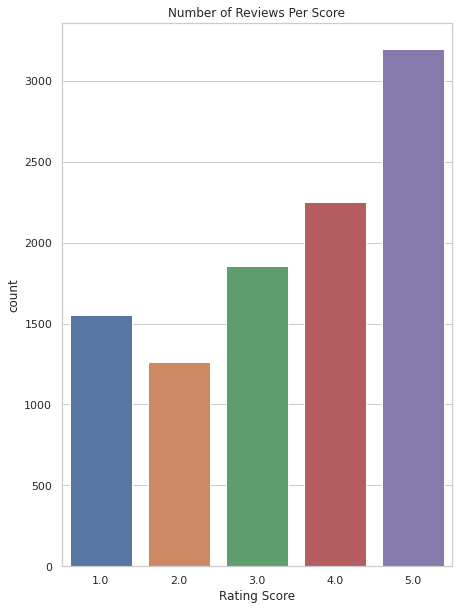

In [12]:
plt.figure(figsize=(7,10))
sns.set(style='whitegrid')
sns.countplot(df.rating)
plt.xlabel('Rating Score');
plt.title('Number of Reviews Per Score')

Now, let's a company with **the highest and the lowest average rating** among the companies we scraped. The average of reviews per score is the highest for HubSpot with around 4.7 and the lowest CDK-Global at slightly less than 2.5.

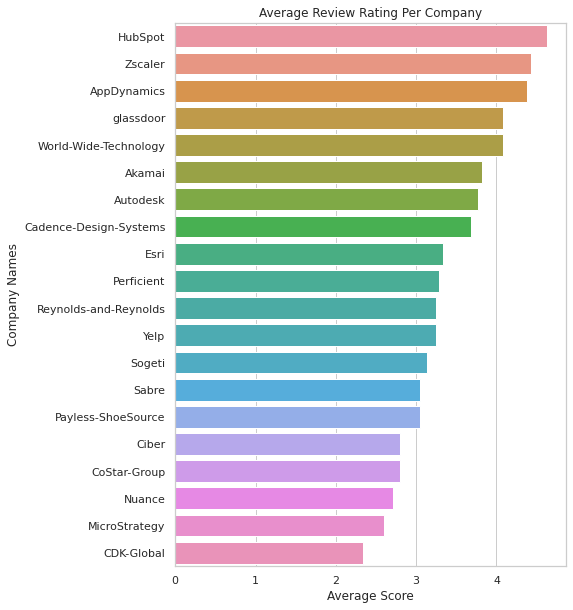

In [13]:
pd.set_option('display.max_rows', None)
avg_per_comp = df.groupby(['company_name']).mean().sort_values(by=['rating'],  ascending=False).reset_index()

plt.figure(figsize=(7,10))
sns.set(style='whitegrid')

sns.barplot(x = 'rating', y = 'company_name', data = avg_per_comp)
plt.title('Average Review Rating Per Company')
plt.xlabel('Average Score');
plt.ylabel('Company Names');

**Scores distribution per company.** HubSpot has the highest number of 5.0 reviews, while CDK-Global has the highest 1.0 reviews. This corresponds to what we have discovered in the previsous graph.

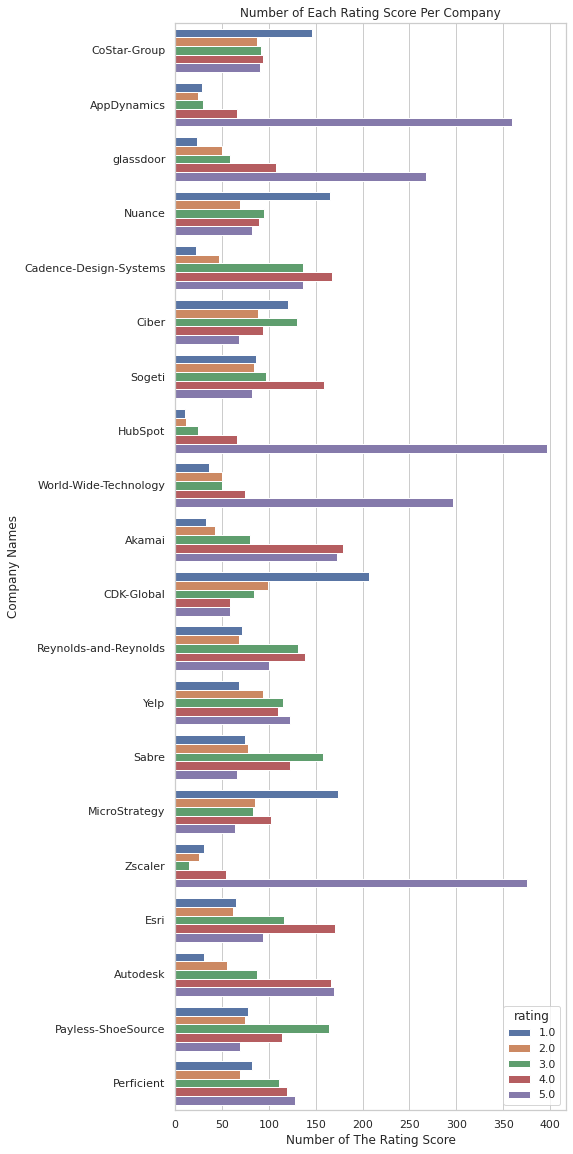

In [14]:
plt.figure(figsize=(7,20))
sns.set(style='whitegrid')
sns.countplot(y="company_name", hue="rating", data=df)
plt.title('Number of Each Rating Score Per Company')
plt.xlabel('Number of The Rating Score');
plt.ylabel('Company Names');

##The Oldest and The Latest Reviews

**Let's examine the newest and oldest reviews that we have scraped.**

The oldest review was created on December 31, 2008.

In [42]:
df_by_time = df.sort_values(by=['date'])
df_by_time.head()

,company_name,employee_title,employee_status,state,city,date,rating,sentiment,review
2532,Cadence-Design-Systems,NaN,"Member of Consulting Staff in Phoenix, AZ",AZ,Phoenix,2008-10-31 11:19:59,3.0,1,"Big & slow, but with some good people.I worked..."
2531,Cadence-Design-Systems,NaN,"Finance Director in San Jose, CA",CA,San Jose,2008-11-10 16:44:33,4.0,2,A good place to start or advance one's career....
2530,Cadence-Design-Systems,NaN,"Senior Member of Technical Staff in San Jose, CA",CA,San Jose,2008-11-28 23:10:15,2.0,0,EDA carrying capacity shrinking. CDNS(other th...
2529,Cadence-Design-Systems,NaN,"Senior Member of Technical Staff in Tempe, AZ",AZ,Tempe,2008-12-05 21:25:33,3.0,1,An OK place for 9 to 5 ers.I worked at Cadence...
2528,Cadence-Design-Systems,NaN,"Program Manager in San Jose, CA",CA,San Jose,2008-12-17 10:14:35,3.0,1,"Will CDNS decide to be #1, #2 or #3 in EDA?I h..."


In [43]:
df_by_time.review[2532]

'Big & slow, but with some good people.I worked at Cadence Design Systems. Knowledgeable colleagues in R&D, and decent compensation.Cadence is a slow-moving place, where R&D projects take forever to come to fruition (or be killed) and decisions take a long time. Bureaucracy is thick. Communication between product groups and divisions is muddled.'

The latest review was created on July 26, 2020.

In [31]:
df_by_time.tail()

,company_name,employee_title,employee_status,state,city,date,rating,sentiment,review
7898,Zscaler,Associate Software Engineer,Current Employee,Punjab,Mohali,2020-07-24 00:05:34,5.0,2,Amazing Experience. I have been working at Zsc...
917,AppDynamics,Senior Consultant,Current Employee,NaN,NaN,2020-07-25 07:22:14,5.0,2,A company that cares about you. I have been wo...
2026,Cadence-Design-Systems,Account Group Director,Former Employee,CA,San Jose,2020-07-25 09:48:06,4.0,2,well run company. I worked at Cadence Design S...
6089,Yelp,Account Executive,Current Employee,DC,Washington,2020-07-26 17:46:00,3.0,1,Great place to learn the fundamentals of sales...
6090,Yelp,Account Executive,Former Employee,CA,San Francisco,2020-07-26 18:28:20,3.0,1,Dial dial dial. I worked at Yelp full-time for...


In [44]:
df_by_time.review[6090]

'Dial dial dial. I worked at Yelp full-time for more than a year. Great team, great benefits, Great training. Long hours, over priced products. '

##Visualzing Sentiments

Although, it's logical to expect that sentiments follow the same pattern as rating. They give more generalized picture.

As we already know, there are much more positive reviews htan negative and neutral taken together. Unfortunately, this most likelt will affect our model results. 

([<matplotlib.axis.XTick at 0x7f30dfd7b4a8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

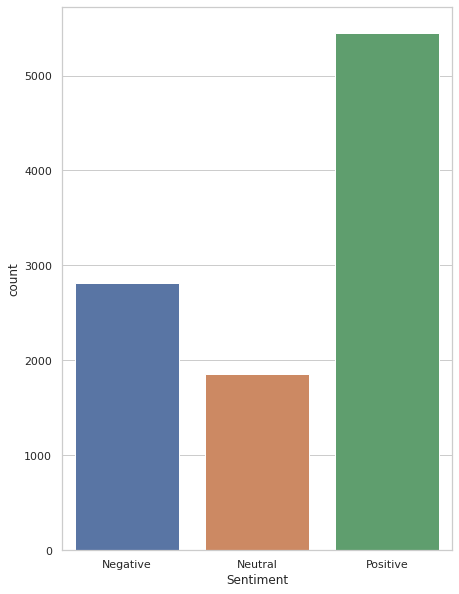

In [53]:
plt.figure(figsize=(7,10))
sns.set(style='whitegrid')
sns.countplot(df.sentiment)
plt.xlabel('Sentiment')
plt.xticks([0,1,2],['Negative', 'Neutral', 'Positive'])

The graph of **average sentiment score per company** looks exactly like the one with the **aver review score per company.**

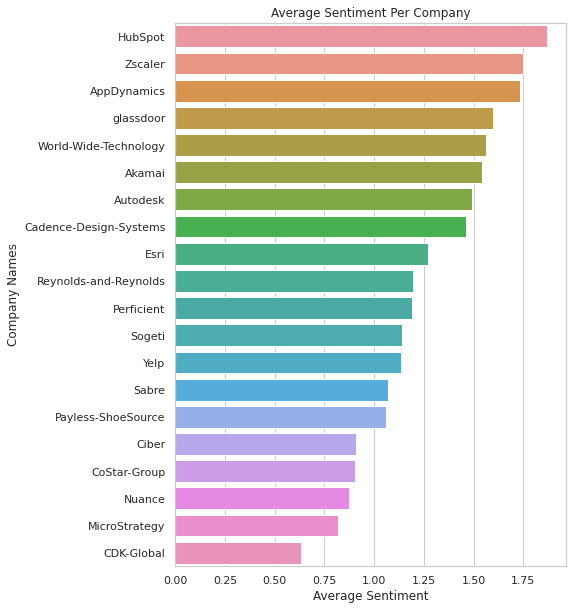

In [54]:
pd.set_option('display.max_rows', None)
avgsent_per_comp = df.groupby(['company_name']).mean().sort_values(by=['sentiment'],  ascending=False).reset_index()

plt.figure(figsize=(7,10))
sns.set(style='whitegrid')

sns.barplot(x = 'sentiment', y = 'company_name', data = avgsent_per_comp)
plt.title('Average Sentiment Per Company')
plt.xlabel('Average Sentiment');
plt.ylabel('Company Names');

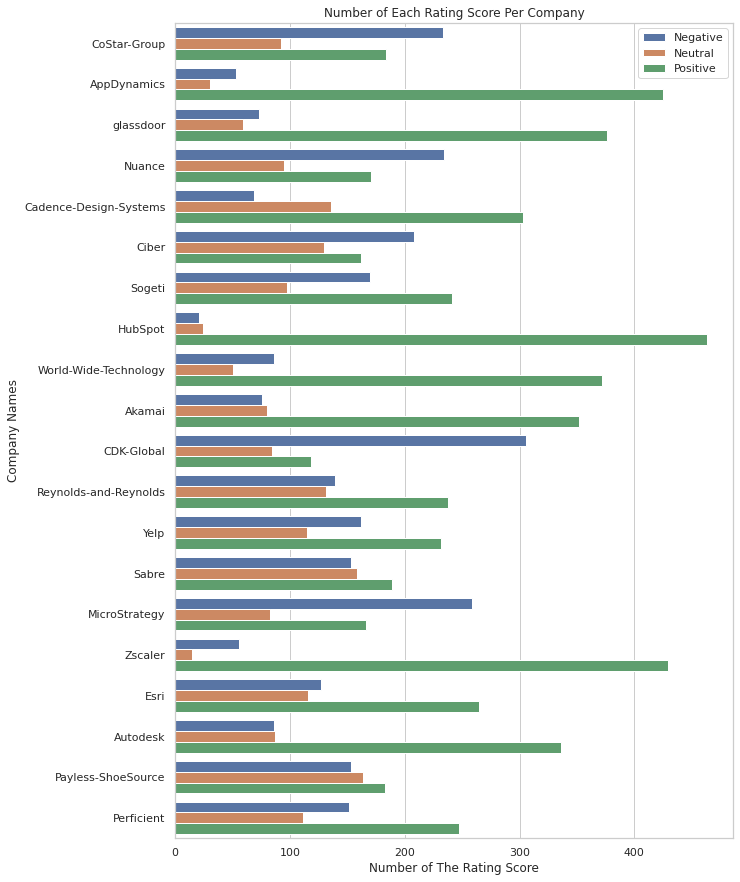

In [63]:
plt.figure(figsize=(10,15))
sns.set(style='whitegrid')
sns.countplot(y="company_name", hue="sentiment", data=df)
plt.title('Number of Each Rating Score Per Company')
plt.xlabel('Number of The Rating Score')
plt.ylabel('Company Names')
L=plt.legend()
L.get_texts()[0].set_text('Negative')
L.get_texts()[1].set_text('Neutral')
L.get_texts()[2].set_text('Positive')
plt.savefig('temp.png')